<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/motion_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

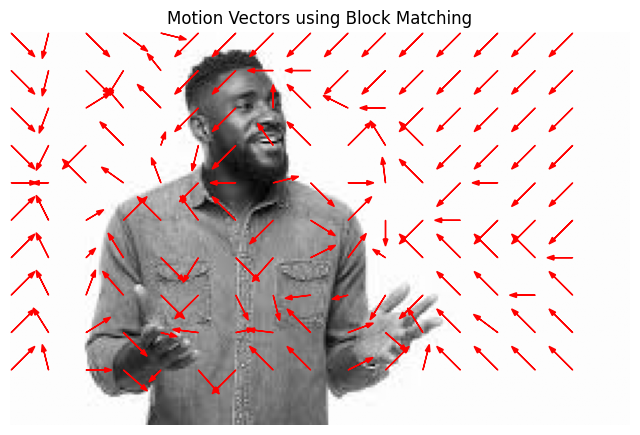

In [3]:
# Program : Motion Vector Estimation using Block Matching


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale frames
frame1 = cv2.imread('/content/download (1).jpg', cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread('/content/download (2).jpg', cv2.IMREAD_GRAYSCALE)

if frame1 is None or frame2 is None:
    print("Error: Images not loaded")
    exit()

# Ensure same size (IMPORTANT FIX)
h = min(frame1.shape[0], frame2.shape[0])
w = min(frame1.shape[1], frame2.shape[1])
frame1 = frame1[:h, :w]
frame2 = frame2[:h, :w]

block_size = 16
search_range = 8

motion_vectors = []

for y in range(0, h - block_size, block_size):
    for x in range(0, w - block_size, block_size):

        block = frame1[y:y+block_size, x:x+block_size]

        # Skip if block size is incorrect
        if block.shape != (block_size, block_size):
            continue

        min_error = float('inf')
        best_dx, best_dy = 0, 0

        for dy in range(-search_range, search_range + 1):
            for dx in range(-search_range, search_range + 1):

                y_ref = y + dy
                x_ref = x + dx

                if y_ref < 0 or x_ref < 0:
                    continue
                if y_ref + block_size > h or x_ref + block_size > w:
                    continue

                ref_block = frame2[
                    y_ref:y_ref + block_size,
                    x_ref:x_ref + block_size
                ]

                # ✅ CRITICAL SAFETY CHECK
                if ref_block.shape != block.shape:
                    continue

                error = np.sum(np.abs(block.astype(int) - ref_block.astype(int)))

                if error < min_error:
                    min_error = error
                    best_dx, best_dy = dx, dy

        motion_vectors.append((x, y, best_dx, best_dy))

# Display motion vectors
plt.figure(figsize=(8,6))
plt.imshow(frame1, cmap='gray')
for x, y, dx, dy in motion_vectors:
    plt.arrow(x, y, dx, dy, color='red', head_width=2)
plt.title("Motion Vectors using Block Matching")
plt.axis('off')
plt.show()
